In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [169]:
ngram_data = "../csv_data/ngram_results.csv.gz"

In [170]:
ngram_df = pd.read_csv(ngram_data)
ngram_df.head()

,zipcode,unigram_list_str,bigram_list_str
0,78736,"[[Barbara, great, host, stayed, three, months,...","[[Barbara great, great host, stayed three, thr..."
1,78705,"[[space, extremely, clean, well, taken, care, ...","[[space extremely, extremely clean, clean well..."
2,78752,"[[Stephanie, perfect, hostess, always, prompt,...","[[Stephanie perfect, perfect hostess, always p..."
3,78734,"[[Pictures, don't, place, justice, rooms, nice...","[[Pictures don't, don't place, place justice, ..."
4,78729,"[[stayed, location, two, nights, could, deligh...","[[stayed location, location two, two nights, n..."


In [171]:
# remove extraneous characters
# convert bigrams to 'unigram' for word cloud
ngram_df["unigram_list_str"] = ngram_df["unigram_list_str"].str.lower().str.replace("[","")\
                                                           .str.replace("]","").str.replace("&","")\
                                                           .str.replace(" ","").str.replace(", ",",")
                                                            
ngram_df["bigram_list_str"] = ngram_df["bigram_list_str"].str.lower().str.replace("[","")\
                                                         .str.replace("]","").str.replace("&","")\
                                                         .str.replace(", ",",").str.replace(" ","_")

In [29]:
ngram_df.head()

,zipcode,unigram_list_str,bigram_list_str
0,78736,"barbara,great,host,stayed,three,months,summer,...","barbara_great,great_host,stayed_three,three_mo..."
1,78705,"space,extremely,clean,well,taken,care,great,ne...","space_extremely,extremely_clean,clean_well,wel..."
2,78752,"stephanie,perfect,hostess,always,prompt,reply,...","stephanie_perfect,perfect_hostess,always_promp..."
3,78734,"pictures,don't,place,justice,rooms,nicer,bigge...","pictures_don't,don't_place,place_justice,rooms..."
4,78729,"stayed,location,two,nights,could,delighted,us,...","stayed_location,location_two,two_nights,nights..."


In [189]:
# define stopwords to remove in word cloud
stopwords = set(STOPWORDS)
unigram_stopwords = ["clean", "nice", "perfect", "austin", "great", "place", "stay", "definitely", 
                     "would", "host", "house", "location", "home", "beautiful", "highly", "recommend",
                     "comfortable", "space", "would", "us", "everything", "'s", "bed", "amazing",
                     "room", "apartment"]
bigram_stopwords = ["would_recommend", "definitely_recommend", "highly_recommend", "great_place", 
                    "great_stay", "great_host", "would_definitely", "definitely_stay", "place_stay", 
                    "great_location", "would_stay", "place_great", "location_great", "highly_recommended",
                    "clean_comfortable", "within_walking", "walking_distance", "stay_austin",
                    "house_clean", "place_clean", "recommend_staying", "everything_needed",
                    "would_highly", "recommend_place", "made_us", "us_feel", "nice_place"]
stopwords.update(unigram_stopwords)
stopwords.update(bigram_stopwords)

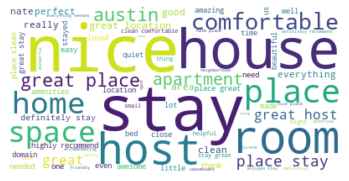

In [186]:
# word cloud example before excluding stopwords
test_text = ngram_df.unigram_list_str[10]
wordcloud = WordCloud(background_color="white", max_words=75).generate(test_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

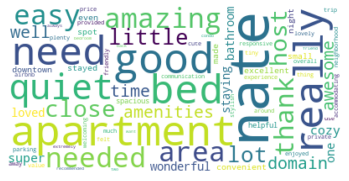

In [187]:
# word cloud example after excluding stopwords
test_text = ngram_df.unigram_list_str[10]
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=75).generate(test_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [190]:
for idx in range(ngram_df.shape[0]):
    filename = ngram_df.zipcode[idx]
    text = ngram_df.unigram_list_str[idx]
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=75).generate(text)
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    # plt.show()
    plt.savefig("../static/images/word_clouds/unigrams/unigram_" + str(filename) + ".png", dpi=100)
    plt.close()

In [230]:
for idx in range(ngram_df.shape[0]):
    filename = ngram_df.zipcode[idx]
    text = ngram_df.bigram_list_str[idx]
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=50).generate(text)
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    # plt.show()
    plt.savefig("../static/images/word_clouds/bigrams/bigram_" + str(filename) + ".png", dpi=100)
    plt.close()

In [129]:
for word in unigram_stopwords:
    ngram_df["unigram_list_str"] = ngram_df["unigram_list_str"].str.replace(word,"")
    
for word in bigram_stopwords:
    ngram_df["bigram_list_str"] = ngram_df["bigram_list_str"].str.replace(word,"")

In [130]:
ngram_df["unigram_list"] = ngram_df["unigram_list_str"].str.split(",")
ngram_df["bigram_list"] = ngram_df["bigram_list_str"].str.split(",")

ngram_df["unigram_count"] = ngram_df["unigram_list"].apply(Counter)
ngram_df["bigram_count"] = ngram_df["bigram_list"].apply(Counter)

In [32]:
ngram_df.head()

,zipcode,unigram_list_str,bigram_list_str,unigram_list,bigram_list,unigram_count,bigram_count
0,78736,"barbara,,,ed,three,months,summer,,thoroughly,e...","barbara_great,,stayed_three,three_months,month...","[barbara, , , ed, three, months, summer, , tho...","[barbara_great, , stayed_three, three_months, ...","{'barbara': 2, '': 6511, 'ed': 144, 'three': 1...","{'barbara_great': 1, '': 1184, 'stayed_three':..."
1,78705,",extremely,,well,taken,care,,neighborhood,,,,t...","space_extremely,extremely_clean,clean_well,wel...","[, extremely, , well, taken, care, , neighborh...","[space_extremely, extremely_clean, clean_well,...","{'': 46016, 'extremely': 366, 'well': 1116, 't...","{'space_extremely': 2, 'extremely_clean': 45, ..."
2,78752,"stephanie,,ess,always,prompt,reply,friendly,th...","stephanie_perfect,perfect_hostess,always_promp...","[stephanie, , ess, always, prompt, reply, frie...","[stephanie_perfect, perfect_hostess, always_pr...","{'stephanie': 14, '': 14755, 'ess': 38, 'alway...","{'stephanie_perfect': 1, 'perfect_hostess': 3,..."
3,78734,"pictures,don't,,justice,rooms,r,bigger,picture...","pictures_don't,don't_place,place_justice,rooms...","[pictures, don't, , justice, rooms, r, bigger,...","[pictures_don't, don't_place, place_justice, r...","{'pictures': 165, 'don't': 73, '': 20743, 'jus...","{'pictures_don't': 11, 'don't_place': 3, 'plac..."
4,78729,"ed,,two,nights,could,delighted,us,thought,,ama...","stayed_location,location_two,two_nights,nights...","[ed, , two, nights, could, delighted, us, thou...","[stayed_location, location_two, two_nights, ni...","{'ed': 206, '': 9073, 'two': 56, 'nights': 35,...","{'stayed_location': 1, 'location_two': 1, 'two..."


In [141]:
def top_10_words(row):
    del row['']
    del row['s']
    return sorted(row.items(), key=operator.itemgetter(1), reverse=True)[:10]

In [142]:
ngram_df["unigram_top10"] = ngram_df["unigram_count"].apply(top_10_words)
ngram_df["bigram_top10"] = ngram_df["bigram_count"].apply(top_10_words)

In [143]:
ngram_df.head()

,zipcode,unigram_list_str,bigram_list_str,unigram_list,bigram_list,unigram_count,bigram_count,unigram_top10,bigram_top10
0,78736,"barbara,,,ed,three,months,summer,,thoroughly,e...","barbara_great,,stayed_three,three_months,month...","[barbara, , , ed, three, months, summer, , tho...","[barbara_great, , stayed_three, three_months, ...","{'barbara': 2, 'ed': 155, 'three': 19, 'months...","{'barbara_great': 1, 'stayed_three': 5, 'three...","[(time, 265), (back, 230), (quiet, 221), (love...","[(john_vivien, 100), (hill_country, 82), (brit..."
1,78705,",extremely,,well,taken,care,,neighborhood,,,,t...","space_extremely,extremely_clean,clean_well,wel...","[, extremely, , well, taken, care, , neighborh...","[space_extremely, extremely_clean, clean_well,...","{'extremely': 366, 'well': 1116, 'taken': 44, ...","{'space_extremely': 2, 'extremely_clean': 45, ...","[(apartment, 1630), (easy, 1606), (close, 1578...","[(ut_campus, 338), (quick_respond, 281), (good..."
2,78752,"stephanie,,ess,always,prompt,reply,friendly,th...","stephanie_perfect,perfect_hostess,always_promp...","[stephanie, , ess, always, prompt, reply, frie...","[stephanie_perfect, perfect_hostess, always_pr...","{'stephanie': 19, 'ess': 38, 'always': 114, 'p...","{'stephanie_perfect': 1, 'perfect_hostess': 3,...","[(chalu, 529), (easy, 434), (time, 431), (room...","[(quiet_neighborhood, 104), (enjoyed_stay, 97)..."
3,78734,"pictures,don't,,jtice,rooms,r,bigger,pictures,...","pictures_don't,don't_place,place_justice,rooms...","[pictures, don't, , jtice, rooms, r, bigger, p...","[pictures_don't, don't_place, place_justice, r...","{'pictures': 165, 'don't': 73, 'jtice': 71, 'r...","{'pictures_don't': 11, 'don't_place': 3, 'plac...","[(lake, 1509), (time, 784), (amazing, 770), (b...","[(lake_travis, 536), (great_time, 185), (enjoy..."
4,78729,"ed,,two,nights,could,delighted,,thought,,amazi...","stayed_location,location_two,two_nights,nights...","[ed, , two, nights, could, delighted, , though...","[stayed_location, location_two, two_nights, ni...","{'ed': 222, 'two': 56, 'nights': 35, 'could': ...","{'stayed_location': 1, 'location_two': 1, 'two...","[(room, 463), (quiet, 332), (ing, 276), (time,...","[(enjoyed_stay, 82), (quiet_neighborhood, 78),..."


In [149]:
ngram_top10_df = ngram_df[["zipcode", "unigram_top10", "bigram_top10"]]
ngram_top10_df.to_csv("../static/data/top_words_by_zipcode.csv", index=False)

In [148]:
ngram_top10_df.head()

,zipcode,unigram_top10,bigram_top10
0,78736,"[(time, 265), (back, 230), (quiet, 221), (love...","[(john_vivien, 100), (hill_country, 82), (brit..."
1,78705,"[(apartment, 1630), (easy, 1606), (close, 1578...","[(ut_campus, 338), (quick_respond, 281), (good..."
2,78752,"[(chalu, 529), (easy, 434), (time, 431), (room...","[(quiet_neighborhood, 104), (enjoyed_stay, 97)..."
3,78734,"[(lake, 1509), (time, 784), (amazing, 770), (b...","[(lake_travis, 536), (great_time, 185), (enjoy..."
4,78729,"[(room, 463), (quiet, 332), (ing, 276), (time,...","[(enjoyed_stay, 82), (quiet_neighborhood, 78),..."
